# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

In [1]:
import json 
import urlparse
import pandas as pd
import requests
import requests_cache
requests_cache.install_cache(cache_name='USDA _cache')
import matplotlib
import matplotlib.pyplot as plt

In [2]:
mykey = ""

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

<font color = "blue">
The following ndb_search function is used to makes a search request from the USDA Food Composition Databases documented web API. The input of the function is a food, such as "apple", "orange", "watermelon", etc. It should be a string. In addition, the API key is also an input of the function, but it was set to be default to my API key which is given in the beginning of this assignment.
<br>
The output of this function is a list of the search result items. Something need to be noted is that if we are not able to find out anything matching our search term, the function will output an empty list [] .
</font>

In [3]:
def ndb_search(food,apikey = mykey):
    """
    Input: food as a search term
    Output: the search result items as a list
    """
    url = "https://api.nal.usda.gov/ndb/search?"
    response = requests.get(url,params= {
        "api_key": apikey,
        "format" : "json",
        "q": food,
        "sort": "n",
        "offset": "0"
    })
    response.raise_for_status()
    if response.json().keys()[0] == "errors":
        return []
    return response.json()[u'list'][u'item']

In [4]:
ndb_search("quail egg")

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 2},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 4},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 5}]

In [5]:
ndb_search("abcdefg")

[]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

<font color = "blue">
In this part, we habe to get the NDB numbers for the food in the fresh.csv file. From the function in Exercise 2.1, we can might get tons of search result from the Web API. Therefore, we have to come up with some strategy to get the best fitted NDB number for each food.

Here is my startegy. I explain them in several part.

<br>

__One-word-food:__

For food with only one word such as "apple", "orange", it's simple. The input of ndb_search() is set to be food with raw, i.e., "apple raw" or "orange raw".

From the result, I found out that the group column for those unbranded food is usually "Fruits and Fruit Juices" and "Vegetables and Vegetable Products". Hence, I delete those result with their group information not in these two. 

Next, I consider some word should not appear in my search result and I delete them.  These words included "juice","without","leaves","-","seed","delicious","soy","California","Arizona", and "Florida". The reason for deleting is that we only want raw food rather than the leaves of a vegetable or juice of certain fruit or food without skin. Also, I don't want the location information affect my searching. Now the output is temporarily named as ndblist.

From the ndblist, I found out that for the name column of the result usually looks like string contains food name , comma, and raw, such as "watermelon, raw" or "Pears, raw". Therefore, I use contain to pick those "food, raw" included in the name column of the result. The remaining result is called FruitCommaRaw

__Two-word-food:__

For those containing more than one word, I will split the string based on "_" and make them as 2 words, then applied ndb_search() to each of them and combine the results together. For example, for green_bean, I will split them into green and bean, then combine the result of ndb_search("green raw") and ndb_search("bean raw") to be the final result of green_bean. 

After searching, I also applied the same method I've mentioned. I also chose results from specific groups and delete some result containing specific words. I also name the remainig data as ndblist.

Next, I will check whether the 2 words and raw indeed included in the name column of the result. The method I use is one-by-one checking. For example, after I got the results of green_bean, I will check whether "green" in in the name column. Next check "bean". And also check "raw". If not included, I will delete those not matching results. This implies that after doing word matching, the remaining results will be those with name containing "green", "bean", and "raw" simultaneously. It's also named as FruitCommaRaw.

__After the above searching__

Also, the data notice me that some food has lots of kind. Among them, there might be one that represent "All varieties", such as "Pineapple, raw, all varieties". For this situation, I next finding if there is any name information containing "all". The reason why I use "all" but not " all varieties" is that for some food there might be some adjective between all and varieties, such as "Oranges, raw, all commercial varieties". The result here is named as AllVarieties

The matching part end here. If any of ndblist, FruitCommaRaw and AllVarieties contain only one element, I succeed in finding the only NDB number for the food.

__If fail to matching__

If the above methods fail to find out the only one NDB numbers, I will continued to use the following method.

I found out that if there are more than one elements, this might because of several brand or color of the food such as apple. For apple, there are "Apples, raw, with skin", "Apples, raw, fuji, with skin", "Apples, raw, red delicious, with skin" or "Apples, raw, granny smith, with skin". Among these, I will pick the simplest one, which containing less adjective than others. The method I use is to find out the shortest one because in general, if the string contains less adjective, the string will be shorter. That is, the shortest name might be the most general one for the food.

In [6]:
fresh = pd.read_csv("fresh.csv")
foodlist = fresh["food"]

In [7]:
def find_food_ndb(food):
    """
    Input: food
    Output: list of search result items with only one element.
    """
    terms= food.split("_")
    
    ndblist = []
    for item in terms:
        ndblist = ndblist + ndb_search(item + " raw")
    ndblist = [item for item in ndblist if item['group'] in ("Fruits and Fruit Juices","Vegetables and Vegetable Products")]
    ndblist = dict((v['ndbno'],v) for v in ndblist).values() # find out non-replicate values
    
    # adding the food information into the search result
    for item in ndblist:
        item.update({u'food':food})

    # delete those containing specific words
    for word in ["juice","without","leaves","-","seed","delicious","soy","California","Arizona","Florida"]:
        ndblist = [item for item in ndblist if word.lower() not in item['name'].lower()]
    
    if len(terms) > 1:
        FruitCommaRaw = ndblist[:]
        for subject in terms+["raw"]:
            FruitCommaRaw = [X for X in FruitCommaRaw if subject in X['name'].encode('utf-8').lower()]
    else:
        FruitCommaRaw = [Y for Y in ndblist if Y['name'].encode('utf-8').lower().__contains__(terms[0]+ ", raw")]
    
    # check if there is any containing "all"
    AllVarieties =  [Z for Z in FruitCommaRaw if Z['name'].encode('utf-8').lower().__contains__("all ")]
    
    if len(ndblist) == 0:
        return [{u'food':food}]
    elif len(ndblist) == 1:
        return ndblist
    elif len(AllVarieties) == 1:
        return AllVarieties
    elif len(FruitCommaRaw) == 1:
        return FruitCommaRaw
    elif len(FruitCommaRaw) > 1 & len(FruitCommaRaw) < len(ndblist):
        output =  FruitCommaRaw
    else:
        output =  ndblist
    
    # pick the shortest one
    if len(output) > 1:
        string_length = [len(item["name"]) for item in output]
        min_string = [x for x in range(len(string_length)) if string_length[x] == min(string_length)]
        output = [output[min_string[0]]]
        return output

In [8]:
NDB_result = pd.DataFrame()
for item in map(find_food_ndb,foodlist):
    NDB_result = NDB_result.append(item)
NDB_result = NDB_result.drop_duplicates() # drop the duplicate row such as cucumbers
NDB_result = NDB_result[["food","name","ndbno"]]
NDB_result

,food,name,ndbno
0,watermelon,"Watermelon, raw",09326
0,cantaloupe,"Melons, cantaloupe, raw",09181
0,tangerines,"Tangerines, (mandarin oranges), raw",09218
0,strawberries,"Strawberries, raw",09316
0,plums,"Plums, raw",09279
0,oranges,"Oranges, raw, all commercial varieties",09200
0,raspberries,"Raspberries, raw",09302
0,pomegranate,"Pomegranates, raw",09286
0,pineapple,"Pineapple, raw, all varieties",09266
0,apricots,"Apricots, raw",09021


<font color = "blue">
The above dataframe is the result of the NDB numbers. It's cleat that there is one wrong matching. The ndbno of sweet potatoes is indeed the ndbno of the onion. Hence, I change the ndbno of the sweet potatoes to be missing value.
<br>
<br>
Also, kiwi is missing here. The reason of failing to get the NDB number of kiwi is that if we use "kiwi raw" to search, there is no any result. The one matching kiwi in the database is "Kiwifruit, green, raw". However, we can only attaining it through searching "kiwifruit raw" instead of "kiwi raw". 
<br>
<br>
For cumumber, I consider it having no influence in providing nutrition with peel or peeled. And for cabbage, although there are green one and red one, in my searching, I tried other ways to get separately ndbno for them and end up failing.

In [9]:
import numpy as np
NDB_result.loc[NDB_result.food.str.contains("sweet_potatoes")] = np.nan

<font color = "blue">
After finding the ndbno for almost every food, I use df.merge() to combine the ndbno information to the original fresh data and named it as newfresh

In [10]:
newfresh = fresh.merge(NDB_result[["food","ndbno"]],"left")
newfresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279


__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

<font color = "blue">
The following ndb_report() function is used to equests a basic food report of the inputed NDB numbers. The output of the function is the list of nutrients for the food.

In [11]:
def ndb_report(NDBno, apikey = mykey):
    """
    Input: a NDB number
    Output: the list of nutrients for the food
    """
    url = "https://api.nal.usda.gov/ndb/V2/reports"
    response = requests.get(url,params = {
            "ndbno" : NDBno,
            "type" : "b",
            "format" : "json",
            "api_key" : apikey
    })
    return response.json()['foods'][0][u'food'][u'nutrients']

In [12]:
ndb_report("09279")[0]

{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

<font color = "blue">
The following food_nutrition() function is used to create a dictionary containing the information of the value of energy, protein, fat, carbonhydrate and fiber attained from ndb_report(ndbno). The input of food_nutrition() is a NDB number.

In [13]:
def food_nutrition(ndbno):
    """
    Input: a NBD number
    Output: a dictionary containing the value of energy, protein, fat, carbonhydrate and fiber attained from ndb_report()
    """
    nutrition_info = {"ndbno" : ndbno}
    for choice in ["Energy","Protein","Total lipid (fat)","Carbohydrate, by difference","Fiber, total dietary"]:
        nutrition_info[choice] = [float(item["value"]) for item in ndb_report(ndbno) if item[u'name'] == choice][0]
    return nutrition_info

<font color = "blue">
Next, I use the food_nutrition() function to get particular nutrition information of each food and use .merge() to combine them with the newfresh data frame. The new data frame is FreshWithNutrition and it will be used in the following analysis.

In [14]:
FreshWithNutrition = newfresh.merge(pd.DataFrame(map(food_nutrition,newfresh["ndbno"].dropna())),"left")
# use .dropna() because food_nutrition() do not accept missing value as an input
FreshWithNutrition.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,"Carbohydrate, by difference",Energy,"Fiber, total dietary",Protein,Total lipid (fat)
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326,7.55,30.0,0.4,0.61,0.15
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181,8.16,34.0,0.9,0.84,0.19
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218,13.34,53.0,1.8,0.81,0.31
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316,7.68,32.0,2.0,0.67,0.30
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279,11.42,46.0,1.4,0.70,0.28


In [15]:
# changing the column name of specific column
FreshWithNutrition.rename(columns={
        "Carbohydrate, by difference" : "Carbohydrate",
        "Fiber, total dietary" : "Fiber",
        "Total lipid (fat)" : "Fat"
    },inplace = True)
FreshWithNutrition.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,Carbohydrate,Energy,Fiber,Protein,Fat
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326,7.55,30.0,0.4,0.61,0.15
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181,8.16,34.0,0.9,0.84,0.19
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218,13.34,53.0,1.8,0.81,0.31
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316,7.68,32.0,2.0,0.67,0.30
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279,11.42,46.0,1.4,0.70,0.28


<font color = "blue">
We try to use some numerical limitation to find out which food provide the best combination of price, yield, and nutrition. 

For nutrition, I only consider two variables. They're Energy and Fiber. For me, energy stands for combination of Carbohydrate, Protein and Fat. Fiber is an important feature for fruit and vegetables. 

Here are the criterion for choosing best combination.
* Price: less than the average price
* Yield: larger than 0.5, which implies that more than half of it is ediable.
* Energy: larger than the average energy
* Fiber: larger than the average Fiber

In [16]:
bestcombination = FreshWithNutrition[(FreshWithNutrition.price_per_lb < FreshWithNutrition.price_per_lb.mean()) & 
                                     (FreshWithNutrition["yield"] > 0.5) & 
                                     (FreshWithNutrition.Energy > FreshWithNutrition.Energy.mean())&
                                    (FreshWithNutrition.Fiber > FreshWithNutrition.Fiber.mean())]  
bestcombination

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,Carbohydrate,Energy,Fiber,Protein,Fat
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09200,11.75,47.0,2.4,0.94,0.12
14,Fresh1,0.566983,0.640000,0.330693,0.292965,bananas,fruit,09040,22.84,89.0,2.6,1.09,0.33
15,Fresh1,1.567515,0.900000,0.242508,0.422373,apples,fruit,09003,13.81,52.0,2.4,0.26,0.17
18,Fresh1,1.461575,0.900000,0.363763,0.590740,pears,fruit,09252,15.23,57.0,3.1,0.36,0.14
33,Fresh1,0.564320,0.811301,0.264555,0.184017,potatoes,vegetables,11362,12.44,58.0,2.5,2.57,0.10


<font color=  "blue">
The above 5 foods all fit the criterion. Four of them are fruit and one of them is vegetables. Among 4 fruit, I prefer to choose bananas. Bananas provide highest Energy, highest Carbohydrate, highest Protein. The Fiber of bananas is also high. Hence, for vegetables, I pick potatoes. For fruit, I pick banana.

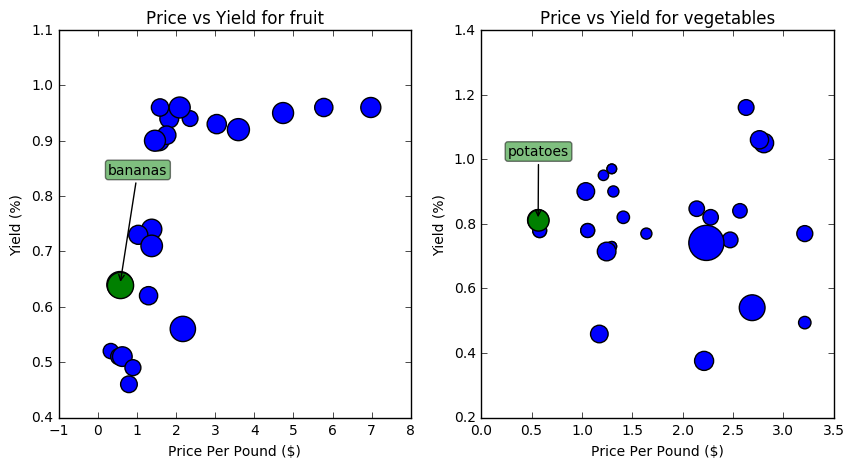

In [17]:
f, ax = plt.subplots(1,2, figsize =[10,5])
ax = ax.ravel()

choice = ["fruit","vegetables"]
pick = ["bananas","potatoes"]
var = zip(choice, pick)
for i in range(len(var)):
    data =  FreshWithNutrition[FreshWithNutrition["type"] == var[i][0]]
    best = data[data.food == var[i][1]]
    # plot all points
    ax[i].scatter(data.loc[:,"price_per_lb"], data.loc[:,"yield"],
            s = data.loc[:,"Energy"]*4)
    # plot specific point in green
    ax[i].scatter(best.loc[:,"price_per_lb"], best.loc[:,"yield"],
            s = best.loc[:,"Energy"]*4, c = "green")
    # adding notation to specific point
    ax[i].annotate(list(best.loc[:,"food"])[0],
             xy = (float(best.loc[:,"price_per_lb"]), float(best.loc[:,"yield"])),
             xytext = (float(best.loc[:,"price_per_lb"])-0.3,float(best.loc[:,"yield"])+0.2),
             bbox=dict(boxstyle='round,pad=0.2', fc='green', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    ax[i].set_title("Price vs Yield for " + var[i][0])
    ax[i].set_xlabel("Price Per Pound ($)")
    ax[i].set_ylabel("Yield (%)")

plt.show()


<font color = "blue">
The plot above is the scatter plot of price vs yield. The different area of each dot represent the energy they provide. The best combination of price, yield and nutrition should be the one with lower price, higher yield, and providing higher nutrition. In general, the points in the upperleft side will be the best combination of price and yield. However, we still need to take consideration of the imformation of nutrition.
<br>
<br>
For vegetables, there are lots of points in the upperleft part of the plot. Among them, I pick potatoes to be the one providing best combination. The point besides potatoes has similar combination of price and yield, but they provide less nutrition. Although other vegetable provide more nutrition than potatoes, they're too expensive.
<br>
<br>
For fruit, my choice might be weird. But taking a look of the plot, most of them are less than $2. Although bananas didn't has the highest yield among all fruit, the yield of bananas is larger than 0.6. This implies that more than half of bananas are ediable. I consider it to be enough. Furthermore, the area of dot for potatoes is the largest, meaning that bananas provide most nutrition among fruits.
<br>
<br>
Based on my analysis, potatoes provided the best combination of price, yield, and nutrition among all vegetables, and bananas provided it among all fruit.